# Before Even Start The Project

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# install modules that we need
!pip install transformers datasets pillow==9.4.0 fastai tqdm

# auto restart runtime 
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

#Basic Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Connecting to Kaggle and dowload the dataset 

In [ ]:
! pip install -q kaggle # install kaggle

In [ ]:
# Connect to kaggle 
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           9607        318  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           8077        200  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:26:03            636         42  1.0              
anas123siddiqui/mobiles                                    Mobiles                                      59KB  2023-02-18 16:3

In [ ]:
#download competition dataset
!kaggle competitions download -c uwb-pose-prediction

100% 984M/987M [02:58<00:00, 11.2MB/s]
100% 987M/987M [02:58<00:00, 5.78MB/s]


## Unzip file

In [ ]:
!unzip /content/uwb-pose-prediction.zip

# starting our projcet

## import our module

In [ ]:
# mostly use library for all project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graph

# project management 
import json # for json file
import os # for path
from glob import glob # for path


## Tensor
# import tensorflow as tf
# import tensorflow.keras as keras


# torch library
import torch # mainly use library for model development
import torchvision.transforms as transforms 
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
import torch.nn.functional as F

# for image processing
import cv2 # for image
import matplotlib.image as mpimg
from PIL import Image, ImageOps 
import PIL

# HuggingFace library
import transformers 
from transformers import TrainingArguments, Trainer
import datasets
from datasets import load_dataset

# I don't know 
import math
import time


%matplotlib inline

In [ ]:
from fastai.vision.all import *

In [ ]:
from tqdm.notebook import tqdm
import plotly.express as px
tqdm.pandas()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from pathlib import Path

In [ ]:
from glob import glob

Setup Path

In [ ]:
HOME_PATH = Path(os.getcwd())
TEST_PATH = Path("/content/test/test")
TRAIN_PATH = Path("/content/train/train")
SUBMIT_PATH_CSV = Path("/content/sample_submission.csv")
ANNOTATION_PATH =Path("/content/annotations.csv") # get labels


## Set up dataframe

In [ ]:
df = pd.read_csv(ANNOTATION_PATH)
df['id'] = df['id'].map(lambda x: TRAIN_PATH/(x+".npy"))
df

,id,class
0,/content/train/train/80a8dc1d-b216-469c-91b1-fc257562a883.npy,0
1,/content/train/train/3ab012da-927a-40d6-95f8-5a2f96dad360.npy,0
2,/content/train/train/eef92f84-5127-4063-a4a2-fee4035b1ac7.npy,0
3,/content/train/train/8d562739-6502-4a6c-8b83-e029b795f685.npy,0
4,/content/train/train/404c2e92-1101-4e62-83bf-a6fdb7dfcb9a.npy,0
...,...,...
642,/content/train/train/ea5513a7-f18a-4393-8ab4-44e574e70f2b.npy,4
643,/content/train/train/edf4aec3-410d-4ed3-90d2-12671bb4c625.npy,4
644,/content/train/train/297e1f02-66ac-4e4e-849a-da2f1103e8a0.npy,4
645,/content/train/train/926418bb-2e66-4c82-82b1-13a82faf73b4.npy,4


In [ ]:
sample = np.load(df['id'][0])
print(sample.shape)
sample

(2560, 56)


array([[ 1.19055156e-02+2.67607253e-03j,  7.79571570e-03-6.37568068e-04j,
         6.48218300e-03-2.65416177e-03j, ...,
         6.79764125e-05+4.33030473e-05j,  2.01755101e-05-4.68734070e-05j,
         2.94903530e-05-4.16475195e-05j],
       [ 1.18879834e-02+2.72146007e-03j,  7.80178932e-03-6.15776924e-04j,
         6.47388538e-03-2.62123067e-03j, ...,
         1.14401031e-04+1.78767194e-04j,  7.11677931e-05+6.12346184e-06j,
         5.85418929e-05-3.04178484e-05j],
       [ 1.18898582e-02+2.70737801e-03j,  7.79680256e-03-6.48299116e-04j,
         6.45120675e-03-2.67797732e-03j, ...,
         8.84411420e-05+2.05215765e-04j,  2.61593505e-05+4.54672045e-05j,
         3.28213573e-05-1.07409915e-05j],
       ...,
       [ 1.18312668e-02+2.92128022e-03j,  7.79286306e-03-4.62570693e-04j,
         6.49371184e-03-2.46745604e-03j, ...,
        -2.88780080e-04+6.20354549e-04j, -1.60705968e-04+4.39782249e-04j,
        -2.81749060e-04+1.88989579e-04j],
       [ 1.18578644e-02+2.81583518e-03j,  7.

# GET Dataset from P'Bossaaaaa

In [ ]:
#import ที่สำคัญ
import pandas as pd
import os
import glob 
import shutil

#read pandas
annotation_df = pd.read_csv("/content/annotations.csv")
annotation_df

#สร้าง folder
os.makedirs("/content/dataset")

os.makedirs("/content/dataset/0")
os.makedirs("/content/dataset/1")
os.makedirs("/content/dataset/2")
os.makedirs("/content/dataset/3")
os.makedirs("/content/dataset/4")
os.makedirs("/content/dataset/5")
os.makedirs("/content/dataset/6")

#สร้าง class เป็น folder

indir = "/content/train/train/"
outdir = "/content/dataset/"

for file_ in os.listdir(indir):
    for i in range(len(annotation_df)):
        
        #print(file_.split(".npy")[0])

        if file_.split(".npy")[0] == annotation_df['id'].iloc[i]:

            #print(os.path.join(indir+file_))  
            #print(os.path.join(outdir + str(annotation_df['class'].iloc[i])))

            file_old = os.path.join(indir+file_)
            file_new = os.path.join(outdir + str(annotation_df['class'].iloc[i]))
            shutil.copy(file_old,file_new)
        

#เช็คจำนวนไฟล์ใน Folder
print("0 =",len(glob.glob("/content/dataset/0/*")))
print("1 =",len(glob.glob("/content/dataset/1/*")))
print("2 =",len(glob.glob("/content/dataset/2/*")))
print("3 =",len(glob.glob("/content/dataset/3/*")))
print("4 =",len(glob.glob("/content/dataset/4/*")))
print("5 =",len(glob.glob("/content/dataset/5/*")))
print("6 =",len(glob.glob("/content/dataset/6/*")))
print("sum = ",len(glob.glob("/content/dataset/*/*")))

0 = 50
1 = 99
2 = 43
3 = 111
4 = 116
5 = 107
6 = 121
sum =  647


# Sample Image Processing

## Process Signal

In [ ]:
import numpy as np 
file1 = Path('/content/dataset/0/075830c4-30ef-42fa-81e6-6441ac3a0316.npy')
file2 = Path('/content/dataset/0/0d37b7f5-20f2-4010-b382-75b4944324e3.npy')
file3 = Path('/content/dataset/0/0f1b99b2-7287-410d-9881-7abc672810a1.npy')
sig1   = np.load(file1)
sig2 = np.load(file2)
sig3  = np.load(file3)
print(sig1.shape)
print(sig2.shape)
print(sig3.shape)
print("10 second of record with 256 FPS")
print("10 second x 256 frame per second ="+str(60*256))

(2560, 56)
(2560, 56)
(2560, 56)
10 second of record with 256 FPS
10 second x 256 frame per second =15360


GET I/Q

GET Range_Time

In [ ]:
#Range time data
def range_time_ver2(IQ_data,step):
  slidestep = step
  n_rd_history = 255
  frame = []
  frames = []
  slidestep_count = 0
  check = 0
  for iqini in IQ_data:
    if len(frame)<n_rd_history:
      frame.append(iqini)
    else:
      if check == 0 :
        frame1 = np.array(frame)
        frames.append(np.copy(frame1))
        check = 1
      if slidestep_count < slidestep:
        frame. append(iqini)
        slidestep_count = slidestep_count+1

      if slidestep_count == slidestep:
        frame = frame[slidestep_count::]
        framel = np.array(frame)
        frames .append(np.copy(frame1))
        slidestep_count = 0
  return np.stack(frames)


In [ ]:
Range_ts_ver2   = range_time_ver2(sig1,12)
Range_ts_ver2.shape

(193, 255, 56)

GET FREQ_TIME

In [ ]:
import scipy.fftpack as fft
def Range_frequency(datas):
    Range_frequency_frame = []
    for data in datas:
        dB = True
        # Range-Doppler
        rd = fft.fft(data, axis=0)
        rd = fft.fftshift(rd, axes=0)
        rd = abs(rd)
        DBrd = 20 * np.log10(rd+1e-10)
        Range_frequency_frame.append(DBrd)
    return np.stack(Range_frequency_frame)
def IQdata(datas):
    iq_vecs = []
    for data in datas:
        data_length = len(data)
        i_vec = np.array(data[:data_length//2])
        q_vec = np.array(data[data_length//2:])
        iq_vec = i_vec + 1j*q_vec
        iq_vecs.append(iq_vec)
    return np.stack(iq_vecs)
def range_time(IQ_data):
    n_rd_history = 256
    frame = []
    frames = []

    for iqini in IQ_data:
        if len(frame)<n_rd_history:
            frame.append(iqini)
        else:  
            frames.append(np.copy(frame))
            frame.append(iqini)
            frame = frame[1::]
            
    return np.stack(frames)

(2560, 56)
(2306, 255, 56)


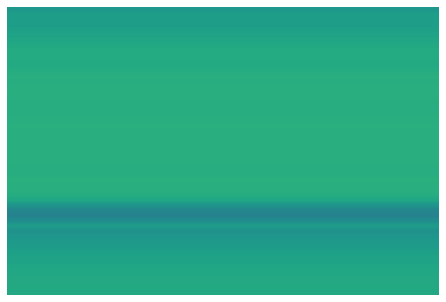

In [ ]:
def signal2spec(file_name):
  sig = np.load(file_name)
  print(sig.shape)


  train  = range_time_ver2(sig,1)
  train = Range_frequency(train)
  print(train.shape)
  try:
    long_train=train.reshape(256*train.shape[0],56)
  except:
    long_train=train.reshape(train.shape[1]*train.shape[0],56)
    # c+=[name]
  fig = plt.figure(frameon=False)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  ax.imshow(np.abs(long_train.T), aspect="auto")
  plt.show()

  # plt.imshow(log_spectrum.T, origin='lower', aspect='auto', cmap='viridis')
  # plt.xlabel('Time')
  # plt.ylabel('Frequency')
  # plt.colorbar()
  # plt.show()



sig = "/content/dataset/2/2046d2e0-8084-42e0-90e9-ba2fc48fcff6.npy"
signal2spec(sig)

In [ ]:
sample_file = []
for i in range(7):
  sig = glob(f'/content/dataset/{i}/*.npy')[5]
  signal2spec(sig)  

TypeError: ignored

In [ ]:
def Pond_signal2spec(path):
  # name=path.split('/')[-1]
  # name=name.split('.')[0]
  print(path)
  train = np.load(path)
  # label=annotations[annotations['id']==name]['class'].values[0]
  train  = range_time(train)
  train = Range_frequency(train)
  try:
    long_train=train.reshape(256*train.shape[0],56)
  except:
    long_train=train.reshape(255*train.shape[0],56)
    # c+=[name]
  fig = plt.figure(frameon=False)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  ax.imshow(np.abs(long_train.T), aspect="auto")
  plt.show()

sample_file = []
for i in range(7):
  sig = glob(f'/content/dataset/{i}/*.npy')[10]
  Pond_signal2spec(sig)  

In [ ]:
from skimage import exposure

sig = "/content/dataset/2/2046d2e0-8084-42e0-90e9-ba2fc48fcff6.npy"

sig1   = np.load(sig)
IQ_sig1   = sig1
Range_time_sig1   = range_time(IQ_sig1)
Range_frequency_sig1   = Range_frequency(Range_time_sig1)
# print(Range_time_sig1.shape)
# print(Range_frequency_sig1.shape)

  
range_freq_sample = np.asarray(Range_frequency_sig1,dtype=np.uint8)
range_time_sample = np.asarray((Range_time_sig1*255),dtype=np.uint8)

avg_range_freq_sample = np.std(range_freq_sample, axis=0)
avg_range_time_sample = np.std(range_time_sample, axis=0)

print(avg_range_freq_sample ,avg_range_time_sample)

import matplotlib.pyplot as plt
ax1 = plt.subplot(1,1,1)
ax1.title.set_text('Range_freq_standing')
im1 = ax1.imshow(np.abs(avg_range_freq_sample),aspect='auto')
plt.show()

ax2 = plt.subplot(1,1,1)
ax2.title.set_text('Range_time_standing')
im2 = ax2.imshow(np.abs(avg_range_time_sample),aspect='auto')

plt.show()


# apply equalize_hist()


# Reshape the average frame to a 2D image
image1 = np.reshape(avg_range_freq_sample, (255, 56))
image2 = np.reshape(avg_range_time_sample, (255, 56))

# Perform histogram equalization on the image
equalized_image1 = exposure.equalize_hist(image1)
equalized_image2 = exposure.equalize_hist(image2)

ax1 = plt.subplot(1,1,1)
ax1.title.set_text('Adjust1')
im1 = ax1.imshow((equalized_image1),aspect='auto')
plt.show()

ax2 = plt.subplot(1,1,1)
ax2.title.set_text('Adjust2')
im2 = ax2.imshow((equalized_image2),aspect='auto')
plt.show()


from sklearn.preprocessing import normalize

result = np.concatenate((normalize(equalized_image1),normalize(equalized_image2)),axis=0)
ax1 = plt.subplot(1,1,1)
ax1.title.set_text('Adjust1')
im1 = ax1.imshow((result),aspect='auto')




plt.show()

In [ ]:
def to_visual2(sig):
  sig1   = np.load(sig)
  IQ_sig1   = sig1[::20]
  Range_time_sig1   = range_time(IQ_sig1)
  Range_frequency_sig1   = Range_frequency(Range_time_sig1)
  
  range_freq_sample = np.asarray(Range_frequency_sig1,dtype=np.uint8)
  range_time_sample = np.asarray((Range_time_sig1),dtype=np.uint8)

  plt.figure(figsize=(10,6))


  ax1 = plt.subplot(1,4,1)
  ax1.title.set_text('Range_freq_standing')
  im1 = ax1.imshow((range_freq_sample),aspect='auto')
 



  plt.show()
  


In [ ]:
sample_file = []
for i in [0,2]:
  sig = glob(f'/content/dataset/{i}/*.npy')[0]
  to_visual2(sig)  

In [ ]:
def to_visual(sig):
  sig1   = np.load(sig)
  IQ_sig1   = sig1
  Range_time_sig1   = range_time(IQ_sig1)
  Range_frequency_sig1   = Range_frequency(Range_time_sig1)
  print(Range_time_sig1.shape)
  print(Range_frequency_sig1.shape)

  
  range_freq_sample = np.asarray(Range_frequency_sig1,dtype=np.uint8)
  range_time_sample = np.asarray((Range_time_sig1*255),dtype=np.uint8)

  avg_range_freq_sample = np.mean(range_freq_sample, axis=0)
  avg_range_time_sample = np.mean(range_time_sample, axis=0)

  plt.figure(figsize=(10,6))


  ax1 = plt.subplot(1,4,1)
  ax1.title.set_text('Range_freq_standing')
  im1 = ax1.imshow(np.abs(avg_range_freq_sample),aspect='auto')
  # plt.show()

  ax2 = plt.subplot(1,4,2)
  ax2.title.set_text('Range_time_standing')
  im2 = ax2.imshow(np.abs(avg_range_time_sample),aspect='auto')

  # plt.show()


  # apply equalize_hist()


  # Reshape the average frame to a 2D image
  image1 = np.reshape(avg_range_freq_sample, (255, 56))
  image2 = np.reshape(avg_range_time_sample, (255, 56))

  # Perform histogram equalization on the image
  equalized_image1 = exposure.equalize_hist(image1)
  equalized_image2 = exposure.equalize_hist(image2)

  ax1 = plt.subplot(1,4,3)
  ax1.title.set_text('Adjust1')
  im1 = ax1.imshow((equalized_image1),aspect='auto')
  # plt.show()

  ax2 = plt.subplot(1,4,4)
  ax2.title.set_text('Adjust2')
  im2 = ax2.imshow((equalized_image2),aspect='auto')



  plt.show()
  


In [ ]:
# sample_file = ["/content/dataset/0/314de89f-0a2b-4442-b222-3315a0dbebb9.npy","/content/dataset/1/29585ec7-63b6-4973-bec0-17220ea67e58.npy",
#                "/content/dataset/2/2046d2e0-8084-42e0-90e9-ba2fc48fcff6.npy","/content/dataset/3/081ed365-6dfa-4fb9-971b-78d41a96d9c7.npy",
#                "/content/dataset/4/03f1b031-3a28-4f3c-8abd-a6cc13c1f7e4.npy","/content/dataset/5/06b49b00-4a45-45bd-bee4-e373ce4b2c97.npy",
#                "/content/dataset/6/02ce5c80-0f5a-47fd-a6ea-f4b384020b12.npy"]
from glob import glob
sample_file = []
for i in [0,2]:
  sig = glob(f'/content/dataset/{i}/*.npy')[0]
  sample_file.append(sig)
for sig in sample_file:
  to_concat(sig)  

In [ ]:
def to_concat(sig):
  signals   = np.load(sig)
  IQ_signals   = signals
  # Range_time_signals   = range_time(IQ_signals)
  # Range_frequency_signals   = Range_frequency(Range_time_signals)
  # print(Range_time_sig1.shape)
  # print(Range_frequency_sig1.shape)
  print(IQ_signals.shape)
  result = np.array(IQ_signals[0])
  for signal in IQ_signals[1::24,:]:
    print(signal.shape)
    signal = np.array(signal)
    signal = signal.reshape((1,-1))
    result = np.stack((result,signal),axis = -1)

  ax1 = plt.subplot(1,1,1)
  ax1.title.set_text('Adjust1')
  im1 = ax1.imshow((result),aspect='auto')
  plt.show()
  


In [ ]:
# sample_file = ["/content/dataset/0/314de89f-0a2b-4442-b222-3315a0dbebb9.npy","/content/dataset/1/29585ec7-63b6-4973-bec0-17220ea67e58.npy",
#                "/content/dataset/2/2046d2e0-8084-42e0-90e9-ba2fc48fcff6.npy","/content/dataset/3/081ed365-6dfa-4fb9-971b-78d41a96d9c7.npy",
#                "/content/dataset/4/03f1b031-3a28-4f3c-8abd-a6cc13c1f7e4.npy","/content/dataset/5/06b49b00-4a45-45bd-bee4-e373ce4b2c97.npy",
#                "/content/dataset/6/02ce5c80-0f5a-47fd-a6ea-f4b384020b12.npy"]
sample_file = []
for i in range(6):
  sig = glob(f'/content/dataset/{i}/*.npy')[10]
  signals   = np.load(sig)
  IQ_signals   = signals
  # Range_time_signals   = range_time(IQ_signals)
  # Range_frequency_signals   = Range_frequency(Range_time_signals)
  # print(Range_time_sig1.shape)
  # print(Range_frequency_sig1.shape)
  # print(IQ_signals.shape)
  result = np.array(IQ_signals[0]).reshape(1,-1)
  for signal in IQ_signals[1::24,:]:
    signal = np.array(signal)
    signal = signal.reshape((1,-1))
    # print(signal.shape)
    result = np.concatenate((result,signal),axis = 0)
    # print(result)

  result = result *255
  to_plot = result.astype(np.uint8)

  ax1 = plt.subplot(1,1,1)
  ax1.title.set_text('Adjust1')
  im1 = ax1.imshow(to_plot,aspect='auto')
  plt.show()

In [ ]:
result = result *255
to_plot = result.astype(np.uint8)

ax1 = plt.subplot(1,1,1)
ax1.title.set_text('Adjust1')
im1 = ax1.imshow(to_plot,aspect='auto')
plt.show()

# Transformer + CNN 
เอา pretained ของ transformer มารวมกับ ค่าสถิติจาก signal

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import VisionTransformer

class CustomModel(nn.Module):
    def __init__(self, image_feature_dim, num_features, num_classes):
        super(CustomModel, self).__init__()
        
        # Load the pre-trained VisionTransformer model
        self.vit_model = VisionTransformer.from_pretrained('vit_base_patch16_224')
        self.vit_model.eval()
        
        # Add a linear layer to reduce the dimensionality of the image features
        self.fc_image = nn.Linear(in_features=image_feature_dim, out_features=128)
        
        # Add a linear layer to process the numerical features
        self.fc_num = nn.Linear(in_features=num_features, out_features=64)
        
        # Add convolutional layers to process the combined features
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1)
        
        # Add linear layers to classify the combined features
        self.fc_combined = nn.Linear(in_features=128 * 26 * 26, out_features=num_classes)
        
    def forward(self, image, num):
        # Extract image features using the VisionTransformer model
        with torch.no_grad():
            image_features = self.vit_model(image)
        
        # Reduce the dimensionality of the image features using a linear layer
        image_features = self.fc_image(image_features)
        
        # Process the numerical features using a linear layer
        num_features = F.relu(self.fc_num(num))
        
        # Combine the image and numerical features
        combined_features = torch.cat((image_features.unsqueeze(2), num_features.unsqueeze(2)), dim=2)
        
        # Pass the combined features through convolutional layers
        x = F.relu(self.conv1(combined_features))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        
        # Flatten the output of the convolutional layers and pass it through a linear layer for classification
        x = x.view(-1, 128 * 26 * 26)
        x = self.fc_combined(x)
        
        return x

# Get Max Vertical Change
I will use just 1 and 4 class for the evaluation

In [ ]:
# !mkdir datasetforMVC

In [ ]:
annotation_df = pd.read_csv("/content/annotations.csv")
annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      647 non-null    object
 1   class   647 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


Create a small dataset for testing this experiment

In [ ]:
#import ที่สำคัญ
import pandas as pd
import os
import glob 
import shutil

#read pandas
annotation_df = pd.read_csv("/content/annotations.csv")
annotation_df

#สร้าง folder
!rm -r /content/datasetforMVC
os.makedirs("/content/datasetforMVC")
os.makedirs("/content/datasetforMVC/1")
os.makedirs("/content/datasetforMVC/4")


#สร้าง class เป็น folder

indir = "/content/train/train/"
outdir = "/content/datasetforMVC/"

for file_ in os.listdir(indir):
    for i in range(len(annotation_df)):
        
        #print(file_.split(".npy")[0])

        if file_.split(".npy")[0] == annotation_df['id'].iloc[i]:
          if annotation_df['class'].iloc[i] == 1 or annotation_df['class'].iloc[i] == 4:
            #print(os.path.join(indir+file_))  
            #print(os.path.join(outdir + str(annotation_df['class'].iloc[i])))

            file_old = os.path.join(indir+file_)
            file_new = os.path.join(outdir + str(annotation_df['class'].iloc[i]))
            shutil.copy(file_old,file_new)
        

#เช็คจำนวนไฟล์ใน Folder
print("1 =",len(glob.glob("/content/datasetforMVC/1/*")))
print("4 =",len(glob.glob("/content/datasetforMVC/4/*")))
print("sum = ",len(glob.glob("/content/datasetforMVC/*/*")))

1 = 99
4 = 116
sum =  215


In [ ]:
import numpy as np

def get_stats(IQ_data):


  real_data = IQ_data.real
  imag_data = IQ_data.imag 

  mean_sub_x = np.array(IQ_data).mean(axis=0)
  velo_data =  np.angle(mean_sub_x) # velocity
  dist_data = np.abs(mean_sub_x) # distance


  # Compute statistical features separately for real and imaginary parts
  mean_real = np.mean(real_data, axis=0)
  std_real = np.std(real_data, axis=0)
  max_real = np.max(real_data, axis=0)
  min_real = np.min(real_data, axis=0)

  mean_imag = np.mean(imag_data, axis=0)
  std_imag = np.std(imag_data, axis=0)
  max_imag = np.max(imag_data, axis=0)
  min_imag = np.min(imag_data, axis=0)


  features =  np.concatenate((mean_real, std_real, max_real, min_real, mean_imag, std_imag, max_imag, min_imag,velo_data,dist_data))

  return features

In [ ]:
import numpy as np

def get_stats2(data):
  # Split the complex data into real and imaginary parts
  data_real = np.real(data)
  data_imag = np.imag(data)

  # Compute mean, variance, and standard deviation for each dimension
  mean_real = np.mean(data_real, axis=0)
  variance_real = np.var(data_real, axis=0)
  std_dev_real = np.std(data_real, axis=0)

  mean_imag = np.mean(data_imag, axis=0)
  variance_imag = np.var(data_imag, axis=0)
  std_dev_imag = np.std(data_imag, axis=0)

  # Compute skewness and kurtosis for each dimension
  skewness_real = np.zeros((1, 56))
  kurtosis_real = np.zeros((1, 56))
  skewness_imag = np.zeros((1, 56))
  kurtosis_imag = np.zeros((1, 56))

  for i in range(56):
      skewness_real[0, i] = np.mean(((data_real[:, i] - mean_real[i]) / std_dev_real[i]) ** 3)
      kurtosis_real[0, i] = np.mean(((data_real[:, i] - mean_real[i]) / std_dev_real[i]) ** 4) - 3
      skewness_imag[0, i] = np.mean(((data_imag[:, i] - mean_imag[i]) / std_dev_imag[i]) ** 3)
      kurtosis_imag[0, i] = np.mean(((data_imag[:, i] - mean_imag[i]) / std_dev_imag[i]) ** 4) - 3

  skewness_real = skewness_real.flatten()
  kurtosis_real = kurtosis_real.flatten()
  skewness_imag = skewness_imag.flatten()
  kurtosis_imag = kurtosis_imag.flatten()
  # Stack all features into a single numpy array
  features =  np.concatenate((mean_real, variance_real, std_dev_real, skewness_real, kurtosis_real,
                        mean_imag, variance_imag, std_dev_imag, skewness_imag, kurtosis_imag))
  return features

In [ ]:
iq_data_jump = np.load('/content/datasetforMVC/1/120e76dc-9ff4-4ff8-8485-54420bdbd0ac.npy')
iq_data_down = np.load('/content/datasetforMVC/4/240f5a7d-524a-4011-aa12-f3e5574b646d.npy')



s1 = get_stats(iq_data_jump)
s2 = get_stats(iq_data_down)

s1.shape
# print(s2)

(280,)

In [ ]:
glob.glob('/content/datasetforMVC')

In [ ]:
num_class = [ x for x in range(7)]
print(num_class)
home_dir = "/content/dataset/"
data = []
for i in num_class :
  for file_ in glob.glob(f'/content/dataset/{i}/*.npy'):
    sig = np.load(file_)
    stats = get_stats(sig)
    label = [i]
    temp_data = np.concatenate((stats,label))
    print(temp_data.shape)
    if temp_data.shape[0] > 10000:
      continue
    data.append(temp_data)
    temp_data = 0


[0, 1, 2, 3, 4, 5, 6]
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,)
(561,

In [ ]:
len(data)

647

In [ ]:
all_features = np.array(data)
all_features.shape

(647, 561)

## EASY TABULAR

In [ ]:
# !pip install autogluon

In [ ]:
f'{df.shape[-1]}'

'5569'

In [ ]:
# to_tabular = all_feature_arr
# df = to_tabular.mean(axis =1)
# df = pd.DataFrame(df)
# df['class'] = y_arr

df = pd.DataFrame(all_features)
df.columns = [ str(x) for x in range(df.shape[-1])]
df.shape
x   = df.drop([ f'{df.shape[-1]-1}' ],axis=1)
y   =  np.real(df[f'{df.shape[-1]-1}'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y , test_size=0.1, random_state=42,shuffle = True)


In [ ]:
print(f'X_train :{X_train.shape}')
print(f'y_train :{y_train.shape}')
print(f'X_val :{X_val.shape}')
print(f'y_val :{y_val.shape}')
print(f'example y train : {y_train[:20]}')

X_train :(582, 560)
y_train :(582,)
X_val :(65, 560)
y_val :(65,)
example y train : [3. 4. 6. 2. 6. 1. 4. 0. 6. 3. 0. 3. 4. 0. 6. 4. 6. 5. 6. 4.]


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
train_df = X_train
train_df['class'] = y_train
train_df.shape

(582, 561)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5559,5560,5561,5562,5563,5564,5565,5566,5567,class
296,0.011719,0.007670,0.006351,0.004836,0.001561,-0.002414,-0.003773,-0.002990,-0.001376,-0.000254,...,0.000484,0.000509,0.000505,0.000488,0.000483,0.000451,0.000429,0.000399,0.000372,3.0
349,0.011758,0.007558,0.006250,0.004561,0.001082,-0.002769,-0.003818,-0.002755,-0.001047,0.000023,...,0.000477,0.000468,0.000459,0.000441,0.000438,0.000420,0.000409,0.000400,0.000375,4.0
284,0.011739,0.007672,0.006336,0.004796,0.001492,-0.002472,-0.003792,-0.002977,-0.001346,-0.000222,...,0.000429,0.000426,0.000425,0.000387,0.000376,0.000373,0.000397,0.000434,0.000443,3.0
211,0.011746,0.007620,0.006230,0.004651,0.001336,-0.002586,-0.003826,-0.002950,-0.001301,-0.000201,...,0.000395,0.000339,0.000338,0.000392,0.000408,0.000438,0.000421,0.000405,0.000419,3.0
537,0.011742,0.007659,0.006303,0.004763,0.001469,-0.002481,-0.003791,-0.002976,-0.001352,-0.000245,...,0.000224,0.000332,0.000407,0.000410,0.000326,0.000209,0.000249,0.000364,0.000440,6.0


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
predictor = TabularPredictor(label='class').fit(train_data=train_df)

No path specified. Models will be saved in: "AutogluonModels/ag-20230308_234149/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230308_234149/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    582
Train Data Columns: 560
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	7 unique label values:  [3.0, 4.0, 6.0, 2.0, 1.0, 0.0, 5.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 7
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


KeyboardInterrupt: ignored

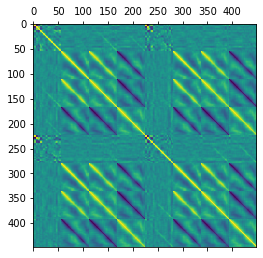

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(train_df.corr())
plt.show()

In [ ]:
train_df.shape

(582, 1)

Plot correlation

In [ ]:
train_df.shape

(582, 561)

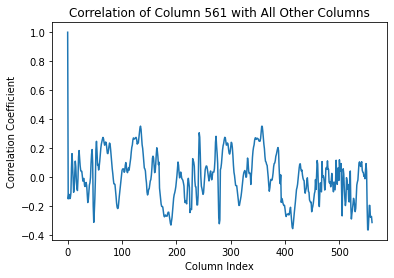

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume that you have a Pandas DataFrame "df" with the I/Q data
# and you want to plot the correlation of the first column with all other columns
col_idx = 560

# Extract the column of interest and all other columns
col_data = train_df.iloc[:, col_idx]
other_data = train_df.drop(train_df.columns[col_idx], axis=1)

# Compute the correlation coefficients between the column of interest and all other columns
corr_coeffs = np.corrcoef(col_data, other_data, rowvar=False)[0]

# Plot the correlation coefficients
plt.plot(corr_coeffs)
plt.xlabel('Column Index')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation of Column {col_idx+1} with All Other Columns')
plt.show()

In [ ]:
corr_coeffs = np.corrcoef(col_data, other_data, rowvar=False)[0]
for i in range(len(corr_coeffs)):
  if corr_coeffs[i] > 0.2 :
    print(f'good corr {i}')
  